https://www.mdeditor.tw/pl/pP6Q/zh-tw

In [1]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from pmdarima.arima import ndiffs
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':60})


# look_back = 1
PARTNO ='85-ECT0010'

# look_back = 3 # 87
# PARTNO ='85-EKA0190'
testdate='202001'
periodType='period[M]'
look_back = 1
#PARTNO ='85-EKA0270'

#STOCK_EVENT_TIME

ModuleNotFoundError: No module named 'pmdarima'

In [197]:
def parser(x):
    from pandas import datetime
    return datetime.strptime(x,'%Y%m')

# Import data : Internet Usage per Minute
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
# df =pd.read_csv("./data/Parts_EQP_Output_ByMonth_20210407_van.csv" , index_col = None)
def fillMissTime():
    df = pd.read_csv("./data/Parts_EQP_Output_ByMonth_20210407_van.csv" ,parse_dates=[8],date_parser=parser)
    # df['MFG_MONTH'] = pd.to_datetime(df['MFG_MONTH'].values, format='%Y%m').astype(periodType)
    df=df[df['PART_NO']==PARTNO] 
    df =df.groupby(['MFG_MONTH']).sum()
    

    df = df.sort_values(by=['MFG_MONTH'], ascending=[True])
    df.reindex(pd.period_range(df.index[0],df.index[-1],freq='M'))

    df = df.reset_index()
    df.drop(columns=['PM','TS','ENG','NST'],inplace=True)
    #return df[df['MFG_MONTH']<=testdate]  ,df[df['MFG_MONTH']>testdate] 
    return df    
df = fillMissTime()

In [198]:
df.head()

,MFG_MONTH,QTY
0,2015-01-01,0
1,2015-02-01,0
2,2015-03-01,0
3,2015-04-01,0
4,2015-05-01,0


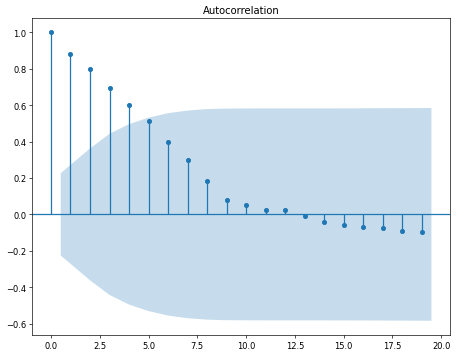

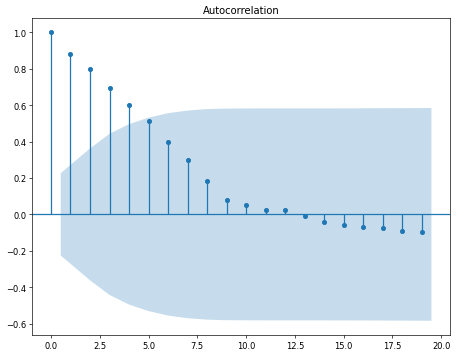

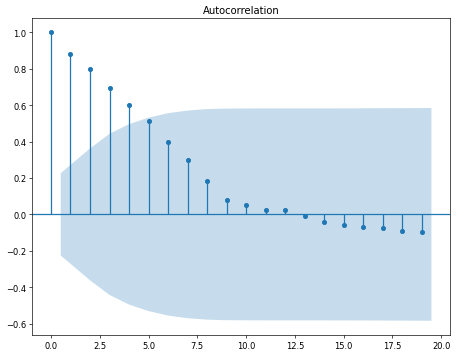

In [199]:
df.set_index("MFG_MONTH", inplace = True)
# df.plot(df.MFG_MONTH,df.QTY)
# df.diff(periods =1)
plot_acf(df)
plot_acf(df)



<AxesSubplot:xlabel='MFG_MONTH'>

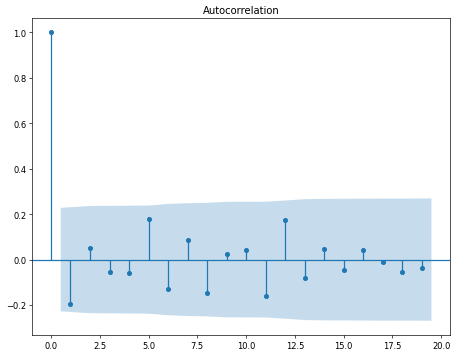

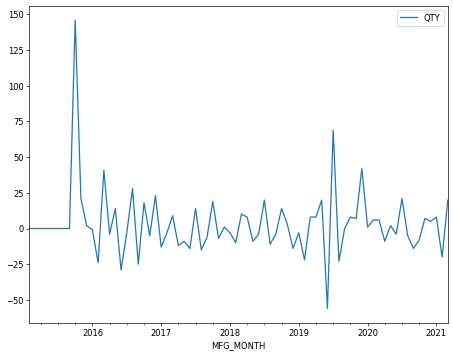

In [200]:
df_diff = df.diff(periods=1)
df_diff=df_diff[1:]
df_diff 
plot_acf(df_diff)
# df.shift(1)
df_diff.plot()

In [201]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [202]:
df.shape

(75, 1)

In [203]:
X=df.values # 75
train=X[0:64] #  64
test =X[64:] # 11
test.size

model_ar =AR(train)
model_ar_fit=model_ar.fit()
predict = model_ar_fit.predict(start = 64,end = 75)

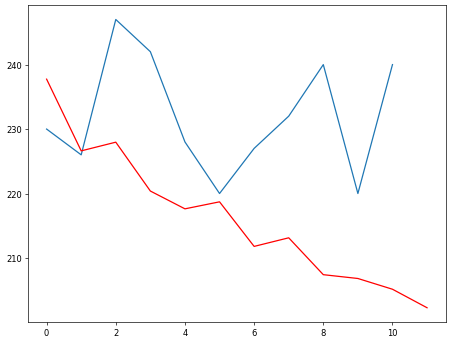

In [204]:
test
plt.plot(test)
plt.plot(predict,color='red')

In [205]:
# # plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# from statsmodels.graphics.tsaplots import *
# from statsmodels.graphics import tsaplots


# fig, axes = plt.subplots(3, 2, sharex=True)
# axes[0, 0].plot(df.QTY); axes[0, 0].set_title('Original Series')
# plot_acf(df.QTY.values, ax=axes[0, 1])

# # 1st Differencing
# axes[1, 0].plot(df.QTY.diff()); axes[1, 0].set_title('1st Order Differencing')
# tsaplots.plot_acf(df.QTY.diff().dropna(), ax=axes[1, 1])

# # 2nd Differencing
# axes[2, 0].plot(df.QTY.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
# tsaplots.plot_acf(df.QTY.diff().diff().dropna(), ax=axes[2, 1])

# plt.show()
# # np.random.seed(1977)
# # data = np.random.normal(0, 1, 100).cumsum()

# # fig, axes = plt.subplots(nrows=4, figsize=(8, 12))
# # fig.tight_layout()

# # axes[0].plot(data)
# # label(axes[0], 'Raw Data')

# # axes[1].acorr(data, maxlags=data.size-1)
# # label(axes[1], 'Matplotlib Autocorrelation')

# # tsaplots.plot_acf(data, axes[2])
# # label(axes[2], 'Statsmodels Autocorrelation')

# # # pd.tools.plotting.autocorrelation_plot(data, ax=axes[3])
# # # label(axes[3], 'Pandas Autocorrelation')

# # # Remove some of the titles and labels that were automatically added
# # for ax in axes.flat:
# #     ax.set(title='', xlabel='')
# # plt.show()

# 構建ARIMA模型

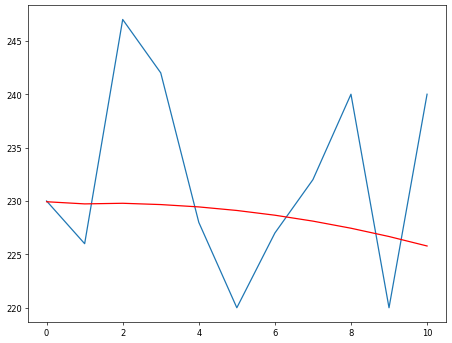

In [221]:
from statsmodels.tsa.arima_model import ARIMA
# df = fillMissTime()
# 1,1,2 ARIMA Model
# model = ARIMA(df['QTY'], order=(1,1,2))
model_arima=ARIMA(train, order=(1,2,1))
model_arima_fit = model_arima.fit(disp=0)
# print(model_arima_fit.summary())
predict = model_arima_fit.forecast(steps=len(test))[0]
plt.plot(test)
plt.plot(predict,color='red')

In [220]:
import itertools
import warnings 
# warnings.filterwarings('ignore')
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
for param in pdq:
    try:
        model_arima =ARIMA(train,order =param)
        model_arima_fit = model_arima.fit(disp=0)
        # print(model_arima_fit.summary())
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 718.4535270404026
(0, 0, 1) 669.3567798140488
(0, 0, 2) 645.1856087962951
(0, 0, 3) 630.3697352153703
(0, 0, 4) 629.4943927205936
(0, 1, 0) 590.7228859579914
(0, 1, 1) 590.5241890187864
(0, 1, 2) 592.4518099677985
(0, 1, 3) 594.070195745231
(0, 1, 4) 596.0613118172246
(0, 2, 0) 636.1064621788335
(0, 2, 1) 588.1515108643852
(0, 2, 2) 588.1728402967541
(0, 2, 3) 590.0730029291062
(0, 2, 4) 591.7178811138332
(1, 0, 0) 604.4570158856993
(1, 0, 1) 605.4902899336096
(1, 0, 2) 606.9652582232702
(1, 0, 3) 608.9066401593632
(1, 0, 4) 610.821937451067
(1, 1, 0) 590.406749121912
(1, 1, 1) 592.382828778523
(1, 2, 0) 610.5858234902628
(1, 2, 1) 588.0407189584096
(1, 2, 2) 590.0005577769058
/Users/lokcyi/opt/anaconda3/envs/python37/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
(1, 2, 3) 591.5959901201925
(1, 2, 4) 593.3898912511804
(2, 0, 0) 605.31104547864

# 檢查殘差
通常會檢查模型擬合的殘差序列，即訓練資料原本的序列減去訓練資料上的擬合序列後的序列。該序列越符合隨機誤差分佈(均值為0的正態分佈)，說明模型擬合的越好，否則，說明還有一些因素模型未能考慮。

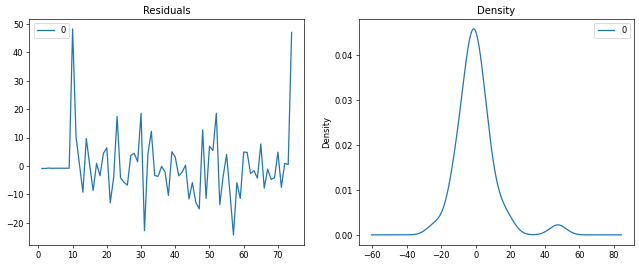

In [182]:
# Plot residual errors
residuals = pd.DataFrame(model_arima_fit.resid)
plt.rcParams["figure.figsize"] = (13,5)
# plt.subplots(figsize = (5, 6))
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [100]:
# ## Adf 檢驗
# ndiffs(df['QTY'], test='adf')  # 2

# # KPSS 檢驗
# ndiffs(df['QTY'], test='kpss')  # 0

# # PP 檢驗:
# ndiffs(df['QTY'], test='pp')  # 2

# 模型擬合


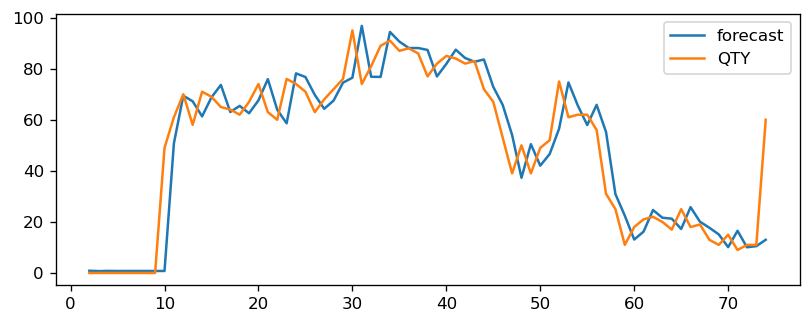

In [101]:

# Actual vs Fitted
plt.rcParams["figure.figsize"] = (8,3)
model_fit.plot_predict(dynamic=False)
plt.show()

# 模型預測
除了在訓練資料上擬合，一般都會預留一部分時間段作為模型的驗證，這部分時間段的資料不參與模型的訓練。

In [ ]:
df

In [178]:


# Create Training and Test
# train = df['QTY'][:20000]
# test = df['QTY'][775:]
train =df[df['MFG_MONTH']<=testdate][['QTY']]
test =df[df['MFG_MONTH']>testdate][['QTY']]
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(2, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
# fc, se, conf = fitted.forecast(20000, alpha=0.05)  # 95% conf
fc, se, conf = fitted.forecast(len(train), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

KeyError: 'MFG_MONTH'

# AUTO ARIMA

In [21]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

model = pm.auto_arima(df['QTY'], start_p=1, start_q=1,
                      information_criterion='aic',
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=108178.658, Time=1.78 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=130936.766, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=114178.845, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=122632.313, Time=0.87 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=108180.510, Time=2.26 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=108180.526, Time=2.23 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=118560.035, Time=1.38 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=110424.262, Time=0.57 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=108181.683, Time=1.76 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=108158.292, Time=5.86 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=121513.289, Time=4.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=113921.288, Time=1.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=108160.269, Time=7.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=108160.271, Time=7.71 sec
 ARIM

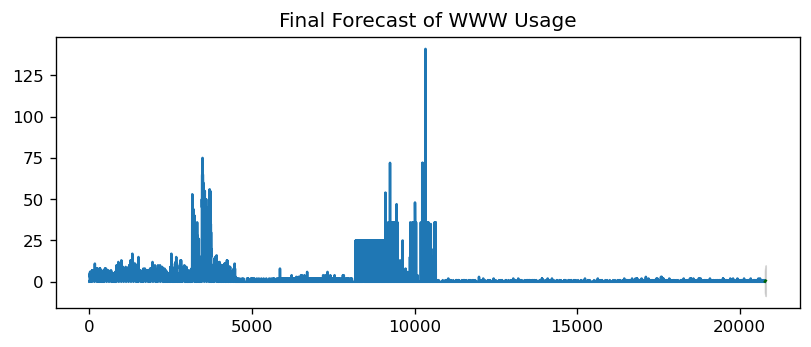

In [22]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df['QTY']), len(df['QTY'])+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.rcParams["figure.figsize"] = (8,3)
plt.plot(df['QTY'])
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

上節介紹的auto arima的程式碼中，seasonal引數設為了false，構建季節性模型的時候，把該引數置為True，然後對應的P，D，Q,m引數即可，程式碼如下：

In [70]:
# !pip3 install pyramid-arima
import pmdarima as pm
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df['QTY'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
smodel.summary()

NameError: name 'data' is not defined

In [ ]:
ef load_data():
    """
    航司乘客數時間序列資料集
    該資料集包含了1949-1960年每個月國際航班的乘客總數。
    """
    from datetime import datetime
    date_parse = lambda x: datetime.strptime(x, '%Y-%m-%d')
    data = pd.read_csv('https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv', index_col='Month', parse_dates=['Month'], date_parser=date_parse)
    # print(data)
    # print(data.index)
    ts = data['value']
    # print(ts.head(10))
    # plt.plot(ts)
    # plt.show()
    return ts,data

In [ ]:
# 載入時間序列資料
_ts,_data = load_data()
# 時間序列分解
result_mul = seasonal_decompose(_ts[-36:],  # 3 years
                                model='multiplicative',
                                freq=12,
                                extrapolate_trend='freq')
_seasonal_frame = result_mul.seasonal[-12:].to_frame()
_seasonal_frame['month'] = pd.to_datetime(_seasonal_frame.index).month
# seasonal_index = result_mul.seasonal[-12:].index
# seasonal_index['month'] = seasonal_index.month.values
print(_seasonal_frame)
_data['month'] = _data.index.month
print(_data)
_df = pd.merge(_data, _seasonal_frame, how='left', on='month')
_df.columns = ['value', 'month', 'seasonal_index']
print(_df)
print(_df.index)
_df.index = _data.index  # reassign the index.
print(_df.index)

build_arima(_df,_seasonal_frame,_data)

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']],
						exogenous=df[['seasonal_index']],
						start_p=1, start_q=1,
						test='adf',
						max_p=3, max_q=3, m=12,
						start_P=0, seasonal=False,
						d=1, D=1, trace=True,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)
sxmodel.summary()
# Forecast
n_periods = 36
fitted, confint = sxmodel.predict(n_periods=n_periods,
								  exogenous=np.tile(seasonal_frame['y'].values, 3).reshape(-1, 1),
								  return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')
# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data['y'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index,
				 lower_series,
				 upper_series,
				 color='k', alpha=.15)

plt.title("SARIMAX Forecast of a10 - Drug Sales")
plt.show()